## 46.1 아나콘다 설치

---

## 46.2 주피터 노트북 사용하기

---

## 46.3 웹 페이지의 HTML을 가져와서 파일로 저장하기

### 46.3.1 가져올 HTML 확인하기

In [6]:
import requests # 웹페이지 HTML을 가져오는 모듈
from bs4 import BeautifulSoup # HTML을 파싱하는 모듈

# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듬
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')

# <table class='table_develop3'>을 찾음
table = soup.find('table', {'class':'table_develop3'})

data = [] # 데이터를 저장할 리스트 생성

for tr in table.find_all('tr'):   # 모든 <tr> 태그를 찾아서 반복
                                  # 각 지점의 데이터를 가져옴
    tds = list(tr.find_all('td')) # 모든 <td>태그를 찾아서 리스트로 만듦
                                  # 각 날씨 값을 리스트로 만듬
    for td in tds:               # <td> 태그 리스트 반복
        if td.find('a'):          # <td> 안에 <a>태그가 있으면
            point = td.find('a').text # <a> 태그 안에서 지점을 가져옴
            temperature = tds[5].text # <td>태그 리스트의 여섯 번째(인덱스5)에서 기온을 가져옴
            humidity =tds[9].text # <td>태그 리스트의 열 번째(인덱스9)에서 습도를 가져옴
            data.append([point, temperature, humidity]) # data리스트에 지점, 기온, 습도를 추가
            
data             

[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

### 46.3.4 데이터를 csv파일에 저장하기

In [7]:
import os

os.mkdir('code_UNIT46') # 폴더 생성

filepath = 'code_UNIT46'
with open(filepath+'/weather.csv','w') as file: # weather.csv 파일을 쓰기 모드로 열기
    file.write('point, temperature, humidity\n') # 컬럼이름 추가
    for i in data: # data 순회
        file.write(f'{i[0]},{i[1]},{i[2]}\n') # 지점, 온도, 습도를 줄 단위로 저장

In [8]:
filepath = 'code_UNIT46'
with open(filepath+'/weather.csv','r') as file: # weather.csv 파일을 읽기 모드로 열기
    r = file.read()
    print(r)

point, temperature, humidity
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
파주,25.1,39
강화,20.0,56
양평,25.5,32
이천,25.6,28
북춘천,24.6,36
북강릉,19.9,56
울릉도,16.8,77
속초,19.1,75
철원,23.9,37
대관령,17.9,49
춘천,25.7,39
강릉,22.7,41
동해,19.5,77
원주,23.4,36
영월,24.2,34
인제,24.3,31
홍천,25.4,25
태백,19.6,43
정선군,23.0,32
서산,23.6,49
청주,24.3,33
대전,25.1,37
충주,24.4,32
추풍령,23.0,35
홍성(예),24.3,46
제천,24.2,32
보은,23.7,28
천안,23.5,35
보령,21.4,56
부여,23.9,37
금산,23.7,30
전주,24.9,44
광주,24.0,35
목포,22.8,51
여수,22.8,49
흑산도,19.2,93
군산,21.8,55
완도,23.2,45
고창,22.7,53
순천,22.5,40
진도(첨찰산),22.2,48
부안,22.9,44
임실,22.8,40
정읍,23.8,47
남원,23.8,35
장수,22.0,33
고창군,23.7,48
영광군,22.4,40
순창군,23.5,38
보성군,23.7,34
강진군,24.1,33
장흥,25.5,33
해남,24.6,40
고흥,24.4,34
광양시,24.6,43
진도군,21.9,58
제주,20.7,60
고산,19.1,74
성산,23.1,33
서귀포,24.0,43
안동,25.0,32
포항,19.0,83
대구,25.7,31
울산,19.7,70
창원,20.6,63
부산,20.2,66
울진,17.6,84
상주,25.0,32
통영,20.0,71
진주,23.8,30
김해시,21.9,60
북창원,22.8,50
양산시,21.4,63
의령군,25.1,40
함양군,23.3,38
봉화,22.0,38
영주,23.0,36
문경,25.5,26
청송군,17.9,71
영덕,19.4,57
의성,25

---

## 46.4 데이터로 그래프 그리기

In [11]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline
import pandas as pd # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl # 그래프를 그리는 패키지
import matplotlib.pyplot as plt # 그래프를 그리는 패키지


# csv파일을 읽어서 DataFrame 객체로 만듬, 인덱스 컬럼은 point로 설정
filepath = 'code_UNIT46'
filename = '/weather.csv'
file = filepath + filename
df = pd.read_csv(file, index_col='point',encoding='euc-kr')
df

,temperature,humidity
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


### 46.4.1 특별시 광역시만 모으기

In [15]:
city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
city_df

,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


### 46.4.2 특별시, 광역시만 그래프 그리기

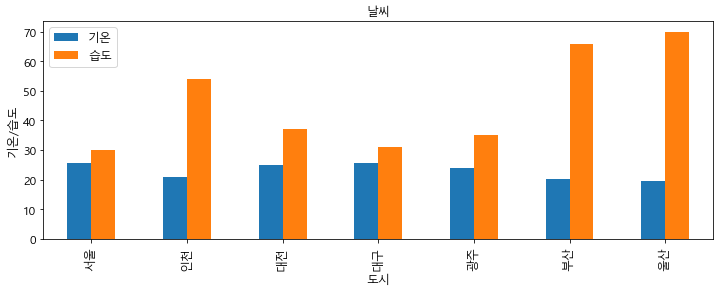

In [16]:
# windows 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

ax = city_df.plot(
    kind='bar',# 차트 종류
    title='날씨',# 제목
    figsize=(12,4),# 차트 크기
    legend=True, # 범례
    fontsize=12 # 폰트 크기 설정
)

ax.set_xlabel('도시', fontsize=12) # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12) # y축 정보 표시
ax.legend(['기온','습도'], fontsize=12) # 범례 지정